# Datasets

Loading and displaying all the datasets.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import webdataset as wds
import re

In [3]:
figsize(16, 8)

def showrow(*args):
    for i, image in enumerate(args):
        subplot(1, len(args), i+1)
        data = np.asarray(image).astype(float)
        data /= np.amax(data)
        imshow(data)

In [4]:
datasets = ['http://storage.googleapis.com/ocropus4-test/gsub-bin-test.tar',
 'http://storage.googleapis.com/ocropus4-test/gsub-lines-test.tar',
 'http://storage.googleapis.com/ocropus4-test/gsub-lseg-test.tar',
 'http://storage.googleapis.com/ocropus4-test/gsub-tess-test.tar',
 'http://storage.googleapis.com/ocropus4-test/gsub-test.tar',
 'http://storage.googleapis.com/ocropus4-test/gsub-words-test.tar',
 'http://storage.googleapis.com/ocropus4-test/gsub-wseg-test.tar',
 'http://storage.googleapis.com/ocropus4-test/publaynet-train-mseg-test.tar',
 'http://storage.googleapis.com/ocropus4-test/publaynet-train-rseg-test.tar',
 'http://storage.googleapis.com/ocropus4-test/publaynet-train-test.tar',
 'http://storage.googleapis.com/ocropus4-test/pubtabnet-train-test.tar']

# Binarization Output

This contains grayscale and binary versions of the same images.

Used for training:
- binarizers
- upscalers
- page rotation estimators
- page skew estimators
- page scale estimators

In [5]:
ds = wds.WebDataset(datasets[0]).decode("pil")
sample = next(iter(ds))
for k, v in sample.items():
    print(f"{k:>20s} : {repr(v)[:80]}")

             __key__ : 'Volume_0935/Image_0028'
             __url__ : 'http://storage.googleapis.com/ocropus4-test/gsub-bin-test.tar'
          __worker__ : 'None'
            __rank__ : 'None'
        __nodeinfo__ : "('sedna', 1548804)"
             bin.png : <PIL.Image.Image image mode=RGB size=1480x2566 at 0x7F0F2BDA66A0>
                jpeg : <PIL.Image.Image image mode=RGB size=1480x2566 at 0x7F0F2BB4D8E0>
             nrm.jpg : <PIL.Image.Image image mode=RGB size=1480x2566 at 0x7F0F2BB4D940>


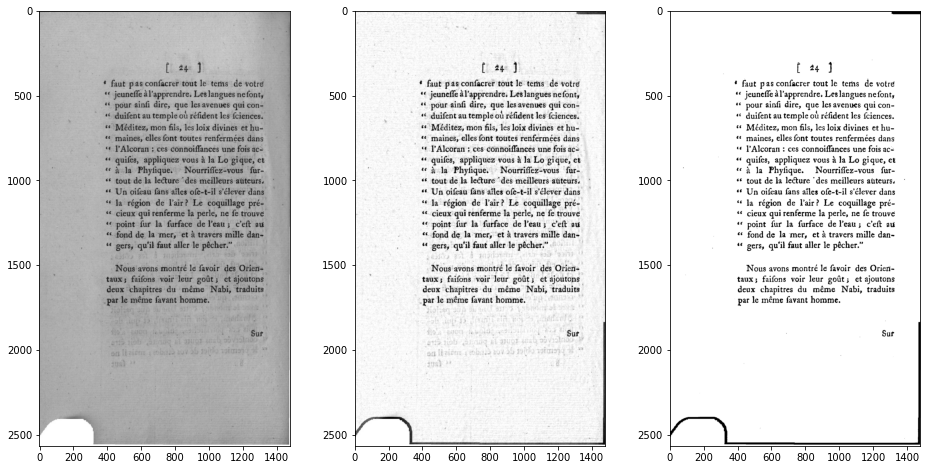

In [6]:
showrow(sample["jpeg"], sample["nrm.jpg"], sample["bin.png"])

# Extracted Text Lines

A collection of text line images and corresponding Unicode text.

This is used for training text line recognizers.

In [7]:
ds = wds.WebDataset(datasets[1]).decode("pil").slice(33, 9999)
sample = next(iter(ds))
for k, v in sample.items():
    print(f"{k:>20s} : {repr(v)[:80]}")

             __key__ : 'Volume_0523/Image_0136@33'
             __url__ : 'http://storage.googleapis.com/ocropus4-test/gsub-lines-test.tar'
          __worker__ : 'None'
            __rank__ : 'None'
        __nodeinfo__ : "('sedna', 1548804)"
                 png : <PIL.Image.Image image mode=RGB size=515x45 at 0x7F0F2B9C2AF0>
                 txt : ' 8th, 1823. Mr. Luckenback says— '
           bbox.json : [82, 600, 597, 645]


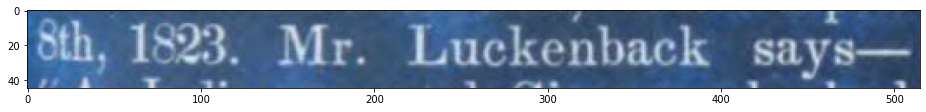

In [8]:
showrow(sample["png"])

# Line Segmentation Patches

A collection of document image patches and their corresponding segmentations.

This is derived from hOCR ground truth and is used for text line segmentation training.

Text line segmenters are used for two purposes:
- extract text line images directly for text line recognition
- group words into text lines

In [9]:
ds = wds.WebDataset(datasets[2]).decode("pil").slice(33, 9999)
sample = next(iter(ds))
for k, v in sample.items():
    print(f"{k:>20s} : {repr(v)[:80]}")

             __key__ : 'Volume_0638/Image_0073@353,-50'
             __url__ : 'http://storage.googleapis.com/ocropus4-test/gsub-lseg-test.tar'
          __worker__ : 'None'
            __rank__ : 'None'
        __nodeinfo__ : "('sedna', 1548804)"
                 png : <PIL.Image.Image image mode=RGB size=512x512 at 0x7F0F2B98FD90>
             seg.png : <PIL.Image.Image image mode=RGB size=512x512 at 0x7F0F2B98F9D0>


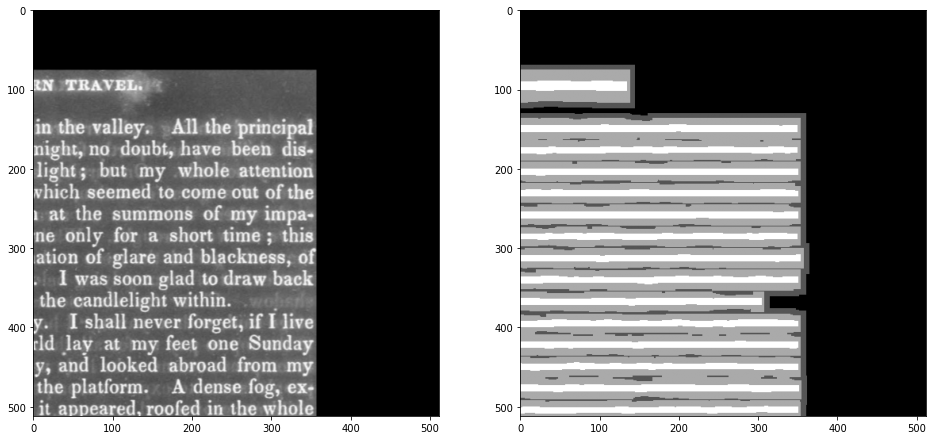

In [10]:
showrow(sample["png"], sample["seg.png"])

# Tesseract Output

Tesseract can be used as the first step in bootstrapping an OCR system, using it as a first step in an EM-style self-supervised training.

This is the output of Tesseract applied to Google 1000 Books. It provides hOCR output for each input image.

In [11]:
ds = wds.WebDataset(datasets[3]).decode("pil").slice(2, 9999)
sample = next(iter(ds))
for k, v in sample.items():
    print(f"{k:>20s} : {repr(v)[:80]}")

             __key__ : 'Volume_0934/Image_0037'
             __url__ : 'http://storage.googleapis.com/ocropus4-test/gsub-tess-test.tar'
          __worker__ : 'None'
            __rank__ : 'None'
        __nodeinfo__ : "('sedna', 1548804)"
                jpeg : <PIL.Image.Image image mode=RGB size=1417x2266 at 0x7F0F2BA20640>
                hocr : b'<?xml version="1.0" encoding="UTF-8"?>\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHT


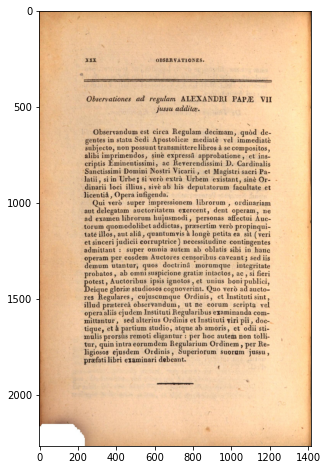

In [12]:
showrow(sample["jpeg"])

# Page Images

This is a dataset that contains only the original page images, with no additional transcripts or other information.

In [13]:
ds = wds.WebDataset(datasets[4]).decode("pil").slice(2, 9999)
sample = next(iter(ds))
for k, v in sample.items():
    print(f"{k:>20s} : {repr(v)[:80]}")

             __key__ : 'Volume_0934/Image_0037'
             __url__ : 'http://storage.googleapis.com/ocropus4-test/gsub-test.tar'
          __worker__ : 'None'
            __rank__ : 'None'
        __nodeinfo__ : "('sedna', 1548804)"
                jpeg : <PIL.Image.Image image mode=RGB size=1417x2266 at 0x7F0F2B937B50>


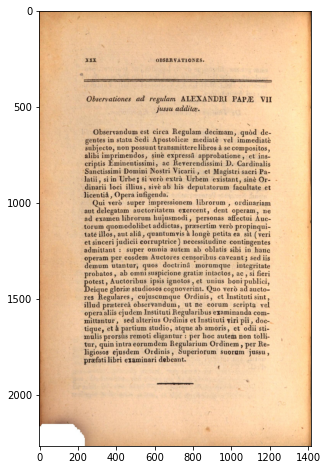

In [14]:
showrow(sample["jpeg"])

# Word Images with Transcriptions

This is a dataset that contains word images and their corresponding transcriptions in Unicode.

It is used to train word recognizers.

In [ ]:
ds = wds.WebDataset(datasets[5]).decode("pil").slice(66, 9999)
sample = next(iter(ds))
for k, v in sample.items():
    print(f"{k:>20s} : {repr(v)[:80]}")

In [ ]:
showrow(sample["png"])

# Word Segmentation Patches

A collection of document image patches and their corresponding word segmentations.

This is used for training document segmentation software.

In [ ]:
ds = wds.WebDataset(datasets[6]).decode("pil").slice(66, 9999)
sample = next(iter(ds))
for k, v in sample.items():
    print(f"{k:>20s} : {repr(v)[:80]}")

In [ ]:
showrow(sample["png"], sample["seg.png"])

# Block Segmentation (PubLayNet)

Images from PubLayNet and their corresponding text/image/table segmentations.

In [19]:
ds = wds.WebDataset(datasets[7]).decode("pil").slice(3, 9999)
sample = next(iter(ds))
for k, v in sample.items():
    print(f"{k:>20s} : {repr(v)[:80]}")

             __key__ : 'PMC5429906_00004'
             __url__ : 'http://storage.googleapis.com/ocropus4-test/publaynet-train-mseg-test.tar'
          __worker__ : 'None'
            __rank__ : 'None'
        __nodeinfo__ : "('sedna', 1548804)"
                json : {'file_name': 'PMC5429906_00004.jpg', 'height': 791, 'id': 286839, 'width': 596,
                 png : <PIL.Image.Image image mode=RGB size=596x791 at 0x7F0F2B8C77C0>
          target.png : <PIL.Image.Image image mode=RGB size=596x791 at 0x7F0F2B8C7EE0>


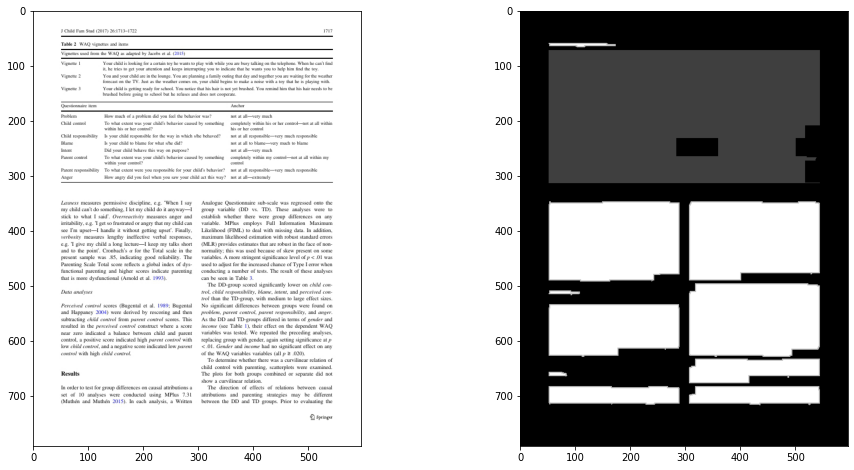

In [20]:
showrow(sample["png"], sample["target.png"])

# Block Segmentation (PubLayNet)

Images from PubLayNet and their corresponding text/image/table segmentations.

This dataset marks text block outlines and is used for actually segmenting paragraphs.



In [21]:
ds = wds.WebDataset(datasets[8]).decode("pil").slice(3, 9999)
sample = next(iter(ds))
for k, v in sample.items():
    print(f"{k:>20s} : {repr(v)[:80]}")

             __key__ : 'PMC5429906_00004'
             __url__ : 'http://storage.googleapis.com/ocropus4-test/publaynet-train-rseg-test.tar'
          __worker__ : 'None'
            __rank__ : 'None'
        __nodeinfo__ : "('sedna', 1548804)"
                json : {'file_name': 'PMC5429906_00004.jpg', 'height': 791, 'id': 286839, 'width': 596,
                 png : <PIL.Image.Image image mode=RGB size=596x791 at 0x7F0F2B734460>
          target.png : <PIL.Image.Image image mode=RGB size=596x791 at 0x7F0F2B82D4F0>


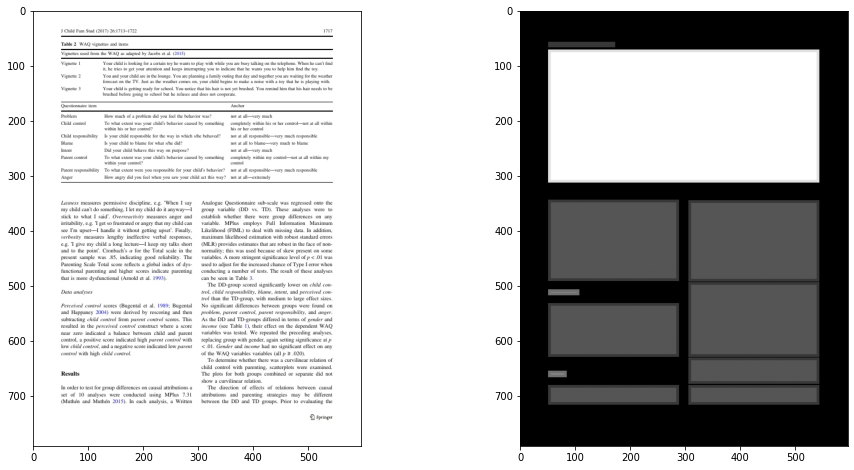

In [22]:
showrow(sample["png"], sample["target.png"])

# PubLayNet Data

The plain PubLayNet dataset. The segmentation patches are derived from this.

In [23]:
ds = wds.WebDataset(datasets[9]).decode("pil").slice(2, 9999)
sample = next(iter(ds))
for k, v in sample.items():
    print(f"{k:>20s} : {repr(v)[:80]}")

             __key__ : 'PMC4323233_00003'
             __url__ : 'http://storage.googleapis.com/ocropus4-test/publaynet-train-test.tar'
          __worker__ : 'None'
            __rank__ : 'None'
        __nodeinfo__ : "('sedna', 1548804)"
                json : {'file_name': 'PMC4323233_00003.jpg', 'height': 794, 'id': 210339, 'width': 596,
                 png : <PIL.Image.Image image mode=RGB size=596x794 at 0x7F0F2B6F6430>


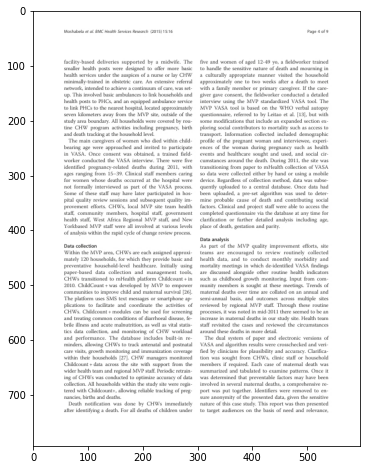

In [24]:
showrow(sample["png"])

# PubTabNet Segmentation Data

Dataset consisting of the table images and corresponding segmentation information from PubTabNet.

In [25]:
ds = wds.WebDataset(datasets[10]).decode("pil").slice(2, 9999)
sample = next(iter(ds))
for k, v in sample.items():
    print(f"{k:>20s} : {repr(v)[:80]}")

             __key__ : 'PMC4828833_003_01'
             __url__ : 'http://storage.googleapis.com/ocropus4-test/pubtabnet-train-test.tar'
          __worker__ : 'None'
            __rank__ : 'None'
        __nodeinfo__ : "('sedna', 1548804)"
                json : {'imgid': 124618, 'html': {'cells': [{'tokens': ['<b>', 'C', 'a', 't', 'e', 'g',
                 png : <PIL.Image.Image image mode=RGB size=238x143 at 0x7F0F2B633190>


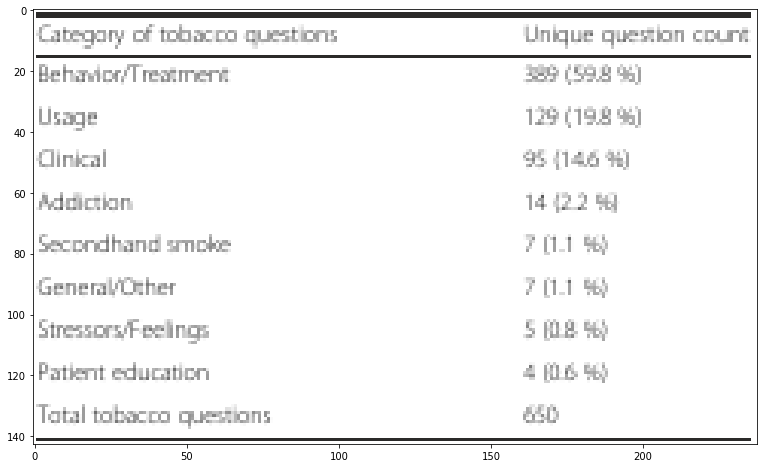

In [26]:
showrow(sample["png"])